The second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [1]:
# For reading stock data from yahoo
from pandas_datareader import data

In [2]:
# For Time stamp
import datetime as dt

In [5]:
# For division
from __future__ import division

In [6]:
#Grab the data
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [28]:
# Set up End and Start times for data grab
end = dt.datetime(2019,5,6)

# Start date to be a year ago of today = end.year - 1
start = dt.datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
#For every stock on the tech_list, take those stock from start and end date
AAPL_prices= data.get_data_yahoo(['AAPL'],start,end )


In [34]:
AAPL_prices.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-05-07,187.669998,184.750000,185.179993,185.160004,42451400.0,182.382812
2018-05-08,186.220001,183.669998,184.990005,186.050003,28402800.0,183.259476
2018-05-09,187.399994,185.220001,186.550003,187.360001,23211200.0,184.549835
2018-05-10,190.369995,187.649994,187.740005,190.039993,27989300.0,187.189621
2018-05-11,190.059998,187.449997,189.490005,188.589996,26212200.0,186.477692


In [30]:
AAPL_prices.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-05-07,187.669998,184.750000,185.179993,185.160004,42451400.0,182.382812
2018-05-08,186.220001,183.669998,184.990005,186.050003,28402800.0,183.259476
2018-05-09,187.399994,185.220001,186.550003,187.360001,23211200.0,184.549835
2018-05-10,190.369995,187.649994,187.740005,190.039993,27989300.0,187.189621
2018-05-11,190.059998,187.449997,189.490005,188.589996,26212200.0,186.477692


In [31]:
# Set up End and Start times for data grab
end = dt.datetime(2019,5,6)

# Start date to be a year ago of today = end.year - 1
start = dt.datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
#For every stock on the tech_list, take those stock from start and end date

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.get_data_yahoo(stock,start,end)

In [35]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,193.315937,189.612071,191.456614,191.538088,3.173853e+07,190.357863
std,21.529472,21.243939,21.343242,21.370985,1.417152e+07,21.038311
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,175.934998,173.945000,174.805000,174.919998,2.203905e+07,174.919998
50%,191.800003,189.070007,190.029999,190.350006,2.786200e+07,188.564056
75%,210.089996,206.904999,208.610001,208.875000,3.740745e+07,207.539825
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [38]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-05-07 to 2019-05-06
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


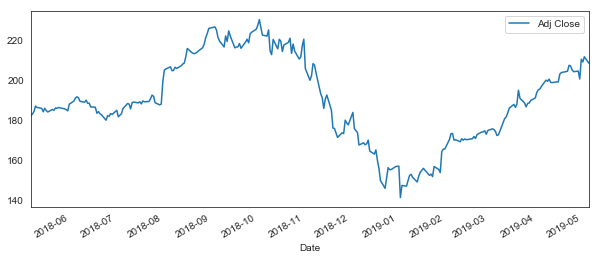

In [49]:
# Let's see a historical view of the closing price, 
# creating Stocking plot
AAPL['Adj Close'].plot(legend = True,figsize=(10, 4))


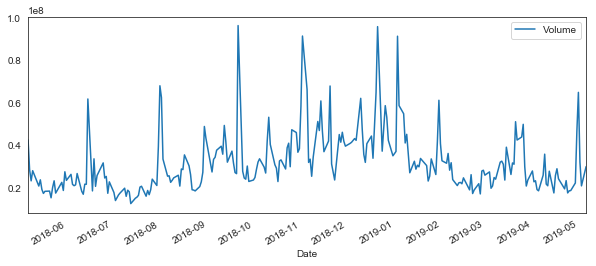

In [48]:
#Plot the total volumn, that was beening traded these days (1 year)
AAPL['Volume'].plot(legend = True,figsize=(10,4))

#Calculating the moving avergae of these days
Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

#Moving Average
A five-day simple moving average (SMA) adds up the five most recent daily closing prices 

⇒	The exponential moving average (EMA) (More recent) . The calculation is more complex, as it applies more weighting to the most recent prices. If you plot a 50-day SMA and a 50-day EMA on the same chart, you'll notice that the EMA reacts more quickly to price changes than the SMA does, due to the additional weighting on recent price data.

⇒	An MA with a short time frame will react much quicker to price changes than an MA with a long look back period. In the figure below, the 20-day moving average more closely tracks the actual price than the 100-day moving average does.

⇒	This is known as a "dead/death cross." Another strategy is to apply two moving averages to a chart: one longer and one shorter. 

In [56]:
#Taking the average of certian time period
#Set the Ma_day as: 10 - average over 10 days, 20 and 50
MA_day = [10,20,50]

#For loop,

for ma in MA_day:
    #For moving average in str(10days, 20 days or 50 days)
    column_name = "MA for %s days" %(str(ma))

#creating a column 
    AAPL[column_name] = pd.DataFrame(AAPL['Adj Close']).rolling(window=ma).mean()
    
url = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.Rolling.mean.html'

In [60]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']]

,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,
2018-05-07,182.382812,NaN,NaN,NaN
2018-05-08,183.259476,NaN,NaN,NaN
2018-05-09,184.549835,NaN,NaN,NaN
2018-05-10,187.189621,NaN,NaN,NaN
2018-05-11,186.477692,NaN,NaN,NaN
2018-05-14,186.042618,NaN,NaN,NaN
2018-05-15,184.351776,NaN,NaN,NaN
2018-05-16,186.072266,NaN,NaN,NaN
2018-05-17,184.895615,NaN,NaN,NaN


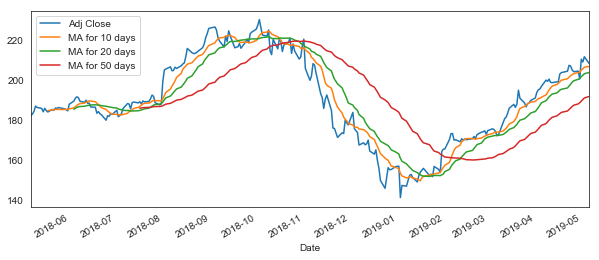

In [61]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend = True,figsize=(10,4))

#Moving average has more days average means that your treand is smoother

In [62]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

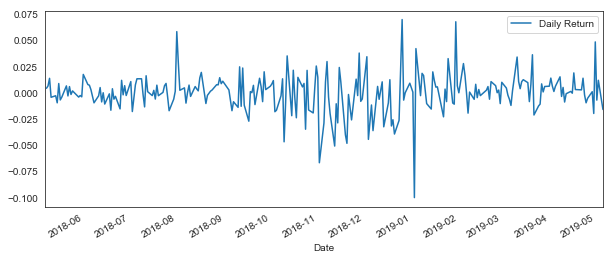

In [65]:
#Daily Return on your graph
AAPL['Daily Return'].plot(legend= True, figsize = (10,4))

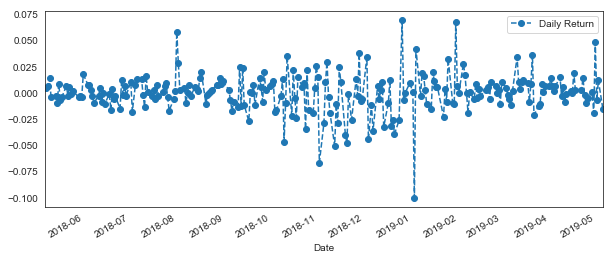

In [67]:
# Adding feature on your figure
AAPL['Daily Return'].plot(legend= True, figsize = (10,4),
                         linestyle = '--',marker = 'o')

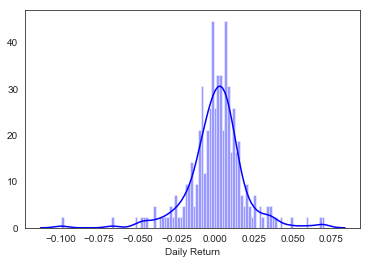

In [75]:
#Daily Return on your graph
#Put on the kde Plot & histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'Blue')

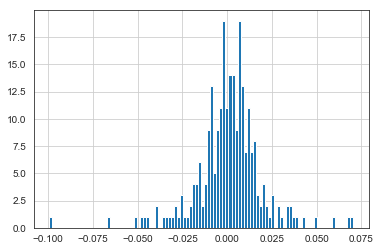

In [76]:
#how's the performance of these stock's daily return
#Only using Pandas built-in command

AAPL['Daily Return'].hist(bins=100)

In [83]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

In [86]:
closing_df = data.get_data_yahoo(tech_list,start,end)['Adj Close']

In [88]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-07,182.382812,1600.140015,1054.790039,94.622849
2018-05-08,183.259476,1592.390015,1053.910034,94.219650
2018-05-09,184.549835,1608.000000,1082.760010,95.330902
2018-05-10,187.189621,1609.079956,1097.569946,96.284805
2018-05-11,186.477692,1602.910034,1098.260010,96.078278


In [89]:
# Make a new tech returns DataFrame only have the percentage return
#Daily return
tech_rets=closing_df.pct_change()


In [92]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-07,NaN,NaN,NaN,NaN
2018-05-08,0.004807,-0.004843,-0.000834,-0.004261
2018-05-09,0.007041,0.009803,0.027374,0.011794
2018-05-10,0.014304,0.000672,0.013678,0.010006
2018-05-11,-0.003803,-0.003834,0.000629,-0.002145


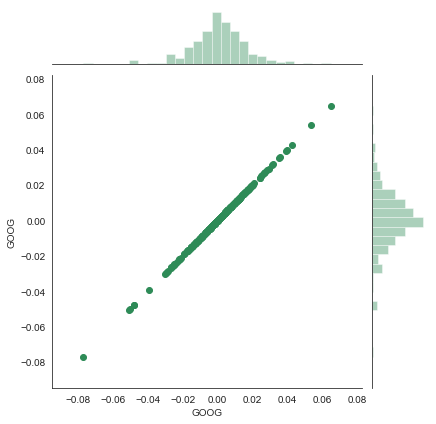

In [94]:
#Using Joint plot
sns.jointplot('GOOG','GOOG',tech_rets,
              kind = 'scatter', color='seagreen')

NameError: name 'stats' is not defined

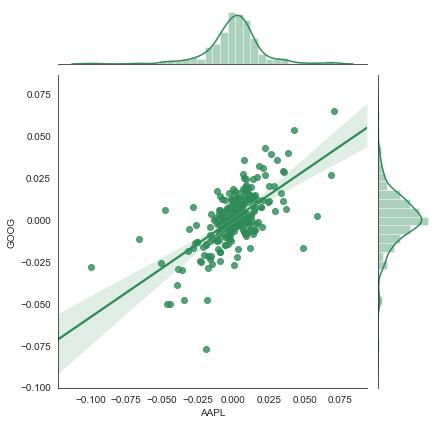

In [98]:
#Distinguish the relationship between Apple and Google

x = sns.jointplot('AAPL','GOOG',tech_rets,
              kind = 'reg', color='seagreen')
x.annotate(stats.pearsonr)
plt.show()


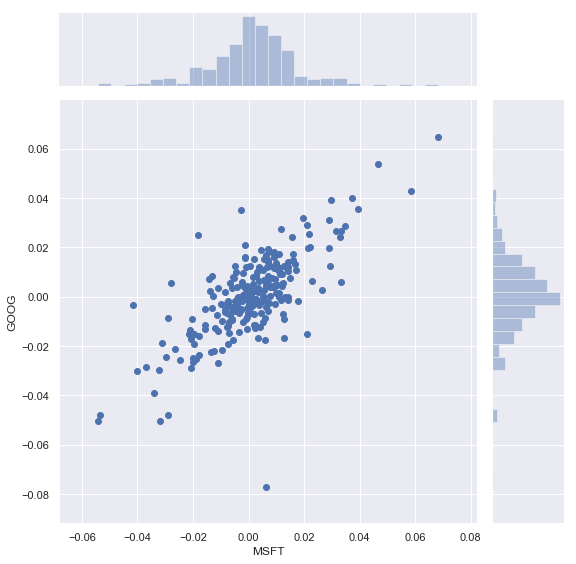

In [101]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('MSFT','GOOG',tech_rets,
              kind = 'scatter', height=8)


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

In [114]:
from IPython.display import SVG
SVG(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg')

<IPython.core.display.SVG object>

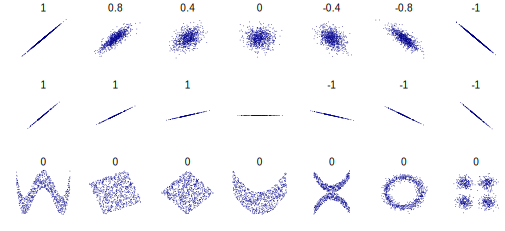

In [103]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

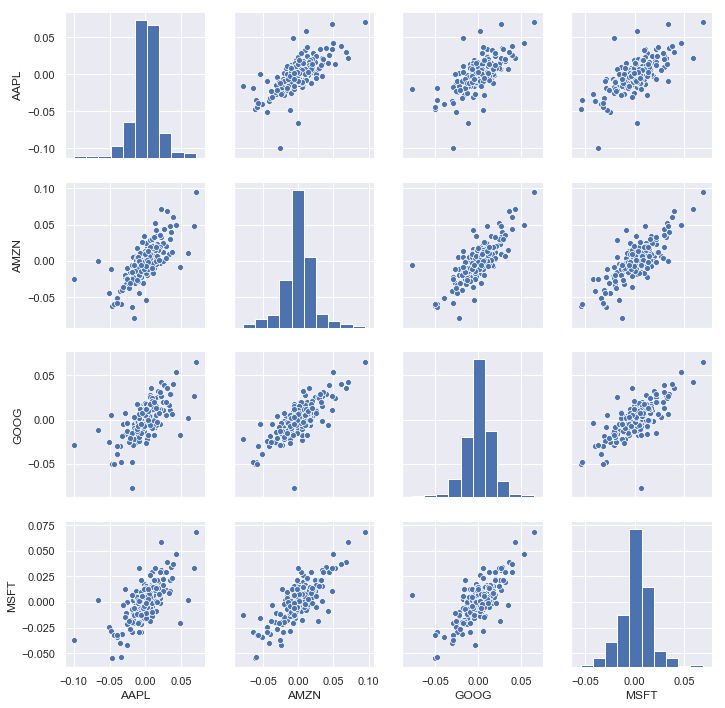

In [116]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets.dropna())

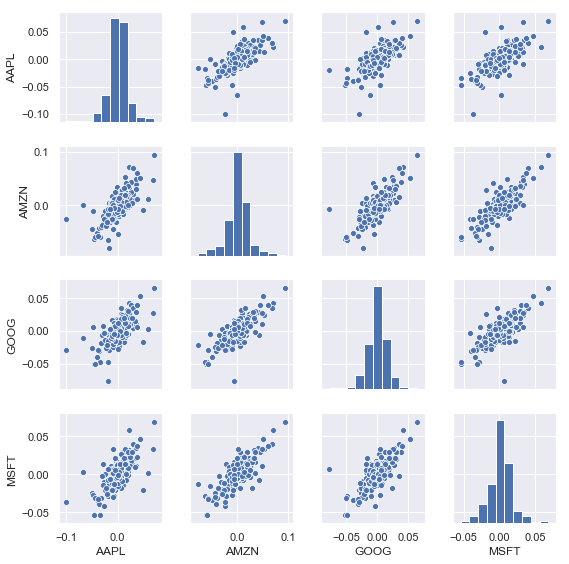

In [119]:
sns.pairplot(data=tech_rets.dropna(),height=2)

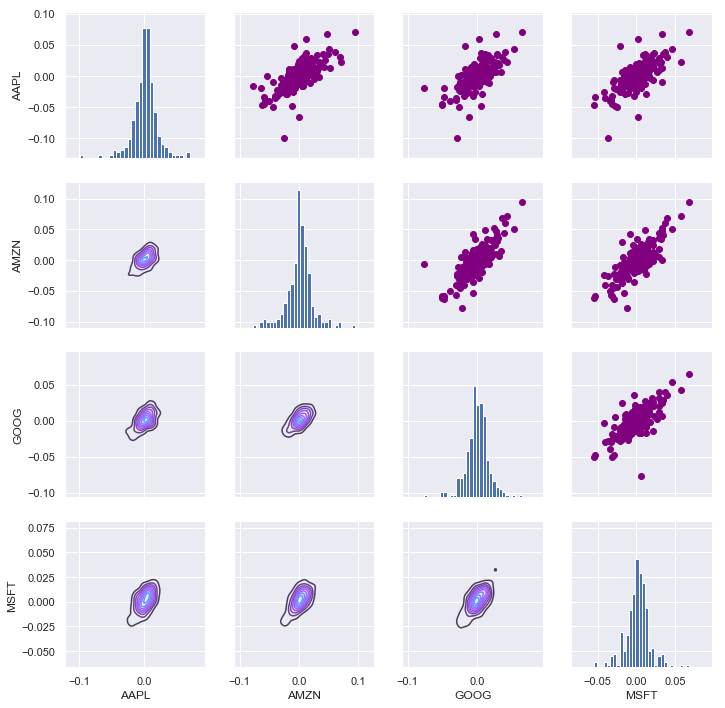

In [120]:
# Set up our figure by naming it returns_fig, 
#call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

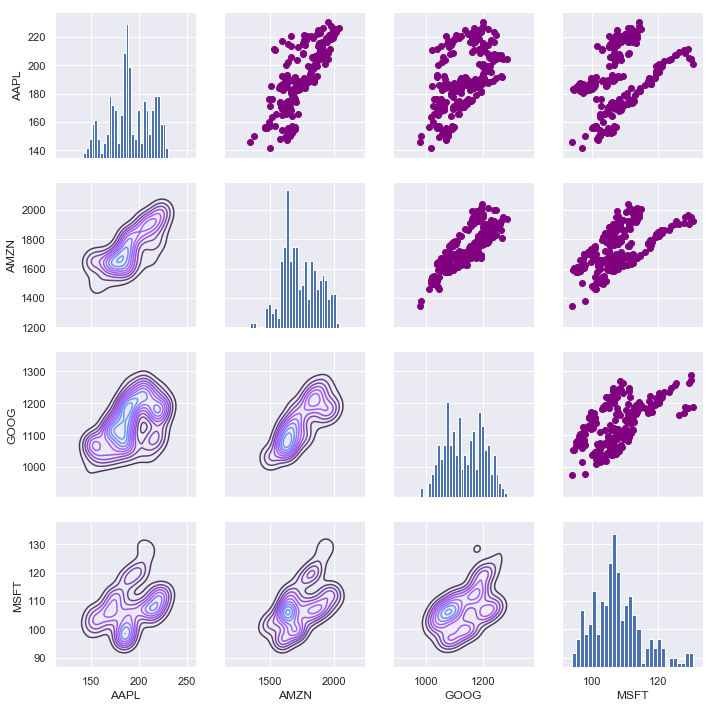

In [121]:
# Set up our figure by naming it returns_fig, 
#call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [122]:
#Numerical Plots
sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

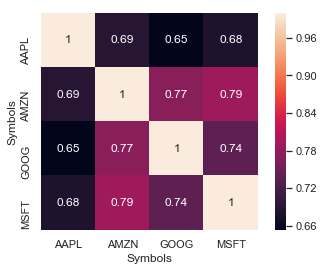

In [127]:
#Numerical Plots
sns.heatmap(tech_rets.dropna().corr(), annot=True,square = 1)

In [128]:
tech_rets

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-07,NaN,NaN,NaN,NaN
2018-05-08,0.004807,-0.004843,-0.000834,-0.004261
2018-05-09,0.007041,0.009803,0.027374,0.011794
2018-05-10,0.014304,0.000672,0.013678,0.010006
2018-05-11,-0.003803,-0.003834,0.000629,-0.002145
2018-05-14,-0.002333,-0.000855,0.001766,0.003378
2018-05-15,-0.009088,-0.015872,-0.019060,-0.007243
2018-05-16,0.009333,0.007081,0.002354,0.002580
2018-05-17,-0.006324,-0.003478,-0.002940,-0.009985


In [129]:
#Risk Analysis - Quantify risk

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

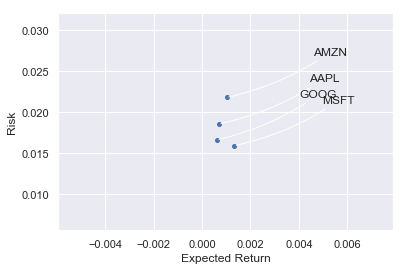

In [192]:
#Defind the area of the circle for the scatter plot
area = np.pi*5

plt.scatter(rets.mean(),rets.std(),s = area)

#Label the plot axis.
plt.xlabel('Expected Return')
plt.ylabel('Risk')

url= 'http://matplotlib.org/users/annotations_guide.html'

# zip including label, x and y;
# set x as the mean, and y as the standard diviation
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (120, 50),
        textcoords = 'offset points', ha = 'right', va = 'top',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.1'))
    
    # you would almost want to choose a higher return and low risk

#Using bootstrap method
Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

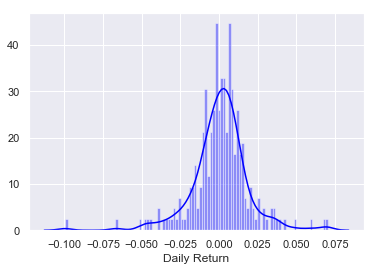

In [146]:
#Bootstrap method
#Plot one histogram with Kde Mapping
sns.distplot((AAPL['Daily Return']).dropna(),
bins = 100,
color ='blue')

In [149]:
#Rets is the Rets_tech without any NaN value
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-08,0.004807,-0.004843,-0.000834,-0.004261
2018-05-09,0.007041,0.009803,0.027374,0.011794
2018-05-10,0.014304,0.000672,0.013678,0.010006
2018-05-11,-0.003803,-0.003834,0.000629,-0.002145
2018-05-14,-0.002333,-0.000855,0.001766,0.003378


In [150]:
rets['AAPL'].quantile(0.05)


-0.0283248552090316

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

In [155]:
rets[['AAPL','AMZN','MSFT','GOOG']].quantile(0.05)

Symbols
AAPL   -0.028325
AMZN   -0.037121
MSFT   -0.027164
GOOG   -0.025563
Name: 0.05, dtype: float64

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt‾‾‾√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt‾‾‾√)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [157]:
# Using Monte Carlo method
URL = 'http://www.investopedia.com/articles/07/montecarlo.asp'

In [159]:
days = 365

dt =1/days

# Now let's grab our mu (drift) 
#from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [160]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # An array full of zeros with number of days you'd like to run it
    price = np.zeros(days)
    # Set the 1st day of the price as the starting price
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days, for python 3 just using range
    for x in range(1,days):
        
        # Calculate Schock, np.random.normal is the normal distribution using ΔS=S(μΔt+σϵΔt‾‾‾√)
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate a drift time
        drift[x] = mu * dt
        # Calculate Price: previous price + (previous price *(drift value * shock value))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [161]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-07,1061.680054,1047.099976,1049.229980,1054.790039,1466100,1054.790039
2018-05-08,1060.550049,1047.145020,1058.540039,1053.910034,1217700,1053.910034
2018-05-09,1085.439941,1056.364990,1058.099976,1082.760010,2032800,1082.760010
2018-05-10,1100.439941,1085.640015,1086.030029,1097.569946,1443000,1097.569946
2018-05-11,1101.329956,1090.910034,1093.599976,1098.260010,1253700,1098.260010


Text(0.5, 1.0, 'Monte Carlo Analysis for Google Inc between 2018.05.07 to 2019.05.07')

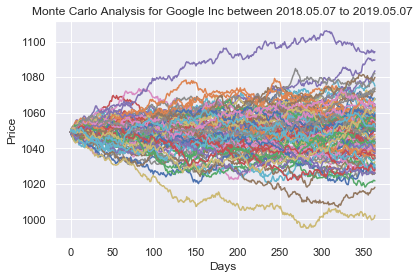

In [163]:
start_price = 1049.229980

#we are going to plot it 100 times.
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google Inc between 2018.05.07 to 2019.05.07')

In [167]:
# For 1000 runs
runs = 1000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy 
#to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Text(0.5, 1.0, 'Final price distribution for GOOGLE after 365 dates')

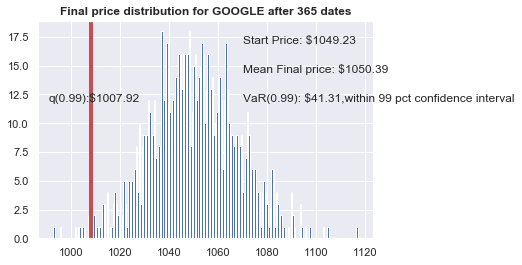

In [174]:
# Now we'lll define q as the 
#1% empirical qunatile, this basically means that 
#99% of the values should fall between here

q = np.percentile(simulations, 1)

#Setting the simulation as histogram graph
plt.hist(simulations, bins = 200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting Price
plt.figtext(0.6,0.8,s= "Start Price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean Final price: $%.2f" %simulations.mean())

#Variance of the price
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f,within 99 pct confidence interval" %(start_price - q))

#Display of 1% quantile
plt.figtext(0.15,0.6, "q(0.99):$%.2f" %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth = 4, color = 'r')

#Title
plt.title(u"Final price distribution for GOOGLE after %s dates" % days, weight = 'bold')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, q(0.99) = Start Ptice - Var(0.99).

99% of the time while you are running the monte carlo simulations, the amount of the money you would loose would be $41.31; for every 1049.23 investment.


This basically menas for every initial stock you purchase your putting about $41.3 at risk 99% of the time from our Monte Carlo Simulation.

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

In [193]:
#Best performance expected return stock - MSFT
days = 365

dt =1/days

# Now let's grab our mu (drift) 
#from the expected return data we got for AAPL
mu = rets.mean()['MSFT']

sigma = rets.std()['MSFT']

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft Inc between 2018.05.07 to 2019.05.07')

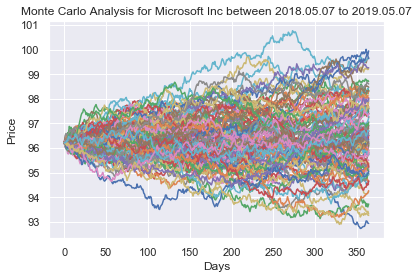

In [198]:
start_price = 96.22001

#we are going to plot it 100 times.
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Microsoft Inc between 2018.05.07 to 2019.05.07')

In [199]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # An array full of zeros with number of days you'd like to run it
    price = np.zeros(days)
    # Set the 1st day of the price as the starting price
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days, for python 3 just using range
    for x in range(1,days):
        
        # Calculate Schock, np.random.normal is the normal distribution using ΔS=S(μΔt+σϵΔt‾‾‾√)
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate a drift time
        drift[x] = mu * dt
        # Calculate Price: previous price + (previous price *(drift value * shock value))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [200]:
# For 1000 runs
runs = 1000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy 
#to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Text(0.5, 1.0, 'Final price distribution for Microsoft after 365 dates')

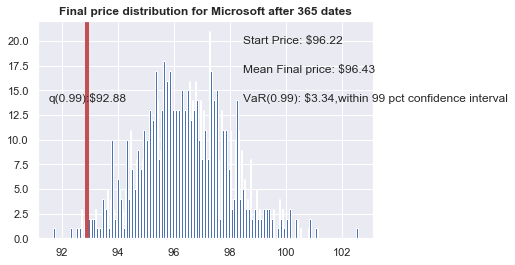

In [201]:
# Now we'lll define q as the 
#1% empirical qunatile, this basically means that 
#99% of the values should fall between here

q = np.percentile(simulations, 1)

#Setting the simulation as histogram graph
plt.hist(simulations, bins = 200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting Price
plt.figtext(0.6,0.8,s= "Start Price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean Final price: $%.2f" %simulations.mean())

#Variance of the price
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f,within 99 pct confidence interval" %(start_price - q))

#Display of 1% quantile
plt.figtext(0.15,0.6, "q(0.99):$%.2f" %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth = 4, color = 'r')

#Title
plt.title(u"Final price distribution for Microsoft after %s dates" % days, weight = 'bold')

In [197]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-07,96.709999,95.099998,95.169998,96.220001,24242000.0,94.622849
2018-05-08,96.160004,95.059998,95.849998,95.809998,23484600.0,94.219650
2018-05-09,96.970001,95.050003,96.010002,96.940002,27327400.0,95.330902
2018-05-10,97.949997,97.050003,97.459999,97.910004,22388100.0,96.284805
2018-05-11,97.870003,97.040001,97.800003,97.699997,16778300.0,96.078278
